In [1]:
import pandas as pd

df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})

df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [2]:
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [3]:
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [5]:
import numpy as np

In [6]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

In [7]:
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [8]:
df['score'] = np.where(df['score']>5, np.nan, df['score'])

In [9]:
df['score']

0    5.0
1    4.0
2    3.0
3    4.0
4    2.0
5    NaN
Name: score, dtype: float64

In [11]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [13]:
mpg = pd.read_csv('mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<AxesSubplot:ylabel='hwy'>

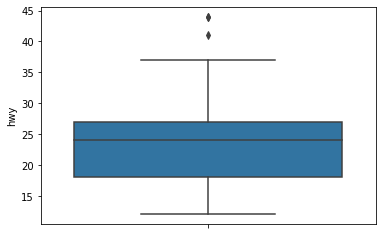

In [14]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [15]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [17]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [18]:
iqr = pct75 - pct25
iqr

9.0

In [20]:
pct25 - 1.5 * iqr

4.5

In [22]:
pct75 + 1.5 * iqr

40.5

In [27]:
import numpy as np
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

In [28]:
mpg['hwy'].isna().sum()

3

In [29]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(hwy_mean = ('hwy', 'mean'))

,hwy_mean
drv,
4,19.174757
f,27.728155
r,21.000000


In [85]:
mpg = pd.read_csv('mpg.csv')
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

In [86]:
import seaborn as sns

In [87]:
mpg['drv'].value_counts().sort_index()

4    100
f    106
k      4
r     24
Name: drv, dtype: int64

In [88]:
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)

In [89]:
mpg['drv'].value_counts().sort_index()

4    100
f    106
r     24
Name: drv, dtype: int64

<AxesSubplot:ylabel='cty'>

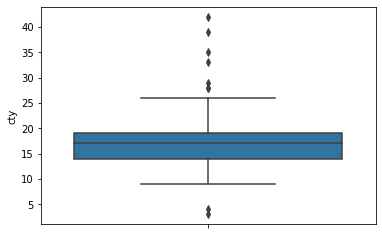

In [90]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'cty')

In [91]:
pct25 = mpg['cty'].quantile(.25)
pct25

14.0

In [92]:
pct75 = mpg['cty'].quantile(.75)
pct75

19.0

In [93]:
iqr = pct75 - pct25
iqr

5.0

In [94]:
pct25-1.5*iqr

6.5

In [95]:
pct75+1.5*iqr

26.5

In [96]:
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5), np.nan, mpg['cty'])

<AxesSubplot:ylabel='cty'>

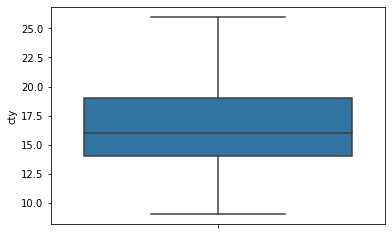

In [97]:
sns.boxplot(data = mpg, y = 'cty')

In [98]:
mpg.dropna(subset = ['drv', 'cty']).groupby('drv').agg(cty_mean = ('cty', 'mean'))

,cty_mean
drv,
4,14.247423
f,19.470000
r,13.958333
